In [ ]:
from __future__ import print_function
from sklearn.naive_bayes import MultinomialNB  # import thư viện cho mô hình Naive Bayes Multinomial
import numpy as np # làm việc với mảng đa chiều trong Python

# train data
d1 = [2, 1, 1, 0, 0, 0, 0, 0, 0] # một mẫu dũ liệu với các đặc trung đc mô tả bằng giá trị số
d2 = [1, 1, 0, 1, 1, 0, 0, 0, 0]
d3 = [0, 1, 0, 0, 1, 1, 0, 0, 0]
d4 = [0, 1, 0, 0, 0, 0, 1, 1, 1]
train_data = np.array([d1, d2, d3, d4]) # định nghĩa dữ liệu huấn luyện
label = np.array(['B', 'B', 'B', 'N']) # nhãn tương ứng với từng mẫu dữ liệu

# test data
d5 = np.array([[2, 0, 0, 1, 0, 0, 0, 1, 0]]) # dữ liệu kiểm thử
d6 = np.array([[0, 1, 0, 0, 0, 0, 0, 1, 1]]) # ta muốn dự đoán nhãn của chúng

## call MultinomialNB
clf = MultinomialNB() # khởi tạo mô hình Naive Bayes Multinomial
# training
clf.fit(train_data, label) # huấn luyện mô hình với dữ liệu huấn luyện và nhãn tương ứng

# test
print('Predicting class of d5:', str(clf.predict(d5)[0])) #clf.predict(d5): dự đoán nhãn của 'd5'
print('Predicting class of d6:', str(clf.predict(d6)[0]))
print('Probability of d5 in each class:', clf.predict_proba(d5)) # xác suất của mỗi nhãn cho 'd5'
print('Probability of d6 in each class:', clf.predict_proba(d6))

Predicting class of d5: B
Predicting class of d6: N
Probability of d5 in each class: [[0.89548823 0.10451177]]
Probability of d6 in each class: [[0.29175335 0.70824665]]


In [ ]:
from __future__ import print_function
from sklearn.naive_bayes import BernoulliNB # import thư viện cho mô hình Naive Bayes Bernoulli
import numpy as np # làm việc với mảng đa chiều trong Python

# train data
d1 = [1, 1, 1, 0, 0, 0, 0, 0, 0] # một mẫu dữ liệu với các đặc trừng được mô tả bằng các giá trị 0, 1
d2 = [1, 1, 0, 1, 1, 0, 0, 0, 0]
d3 = [0, 1, 0, 0, 1, 1, 0, 0, 0]
d4 = [0, 1, 0, 0, 0, 0, 1, 1, 1]

train_data = np.array([d1, d2, d3, d4]) # dữ liệu huấn luyện
label = np.array(['B', 'B', 'B', 'N']) # 0 - B, 1 - N; nhãn tương ứng với mỗi mẫu dữ liệu

# test data
d5 = np.array([[1, 0, 0, 1, 0, 0, 0, 1, 0]]) # mẫu dữ liệu mới
d6 = np.array([[0, 1, 0, 0, 0, 0, 0, 1, 1]]) # cần kiểm thử nhãn của chúng

## call MultinomialNB
clf = BernoulliNB() # Khởi tạo mô hình NB Bernoulli
# training
clf.fit(train_data, label) # Huấn luyện mô hình
# test
print('Predicting class of d5:', str(clf.predict(d5)[0])) # Dự đoán nhãn của 'd5'
print('Predicting class of d6:', str(clf.predict(d6)[0]))
print('Probability of d5 in each class:', clf.predict_proba(d5)) # Xác suất của mỗi nhãn cho 'd5'
print('Probability of d6 in each class:', clf.predict_proba(d6))

Predicting class of d5: B
Predicting class of d6: N
Probability of d5 in each class: [[0.76554295 0.23445705]]
Probability of d6 in each class: [[0.16948581 0.83051419]]


In [ ]:
## packages
from __future__ import division, print_function, unicode_literals #Điều chỉnh cách Python xử lý một số tính năng như phép chia, in, và chuỗi Unicode.
import numpy as np # Import thư viện NumPy cho việc làm việc với mảng và ma trận.
from scipy.sparse import coo_matrix # for sparse matrix (ma trận thưa)
from sklearn.naive_bayes import MultinomialNB, BernoulliNB #  Import hai loại mô hình Naive Bayes từ thư viện scikit-learn
from sklearn.metrics import accuracy_score # for evaluating results (đánh giá kết quả mô hình)

# data path and file name
path = '' # đường dẫn tới thư mục chứa file data
train_data_fn = 'train-features.txt' # tên file
test_data_fn = 'test-features.txt'
train_label_fn = 'train-labels.txt'
test_label_fn = 'test-labels.txt'


In [ ]:
nwords = 2500 # số lượng từ vựng

def read_data(data_fn, label_fn) # Đọc dữ liệu từ file và tạo ma trận thưa thớt (sparse matrix) để biểu diễn dữ liệu.
## read label_fn
  with open(path + label_fn) as f:
    content = f.readlines()
  label = [int(x.strip()) for x in content]

  ## read data_fn
  with open(path + data_fn) as f:
    content = f.readlines()
  # remove '\n' at the end of each line
  content = [x.strip() for x in content]

  dat = np.zeros((len(content), 3), dtype = int)

  for i, line in enumerate(content):
    a = line.split(' ')
    dat[i, :] = np.array([int(a[0]), int(a[1]), int(a[2])])

  # remember to -1 at coordinate since we're in Python
  # check this: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo _matrix.html
  # for more information about coo_matrix function
  data = coo_matrix((dat[:, 2], (dat[:, 0] - 1, dat[:, 1] - 1)),\
    shape=(len(label), nwords))
  return (data, label) # trả về một tuple chứa ma trận dữ liệu và nhãn tương ứng.


In [ ]:
(train_data, train_label) = read_data(train_data_fn, train_label_fn) # đọc dữ liệu huấn luyện
(test_data, test_label) = read_data(test_data_fn, test_label_fn) # đọc dữ liệu kiểm thử

clf = MultinomialNB() # Khởi tạo mô hình
clf.fit(train_data, train_label) # Huấn luyện mô hình
y_pred = clf.predict(test_data) # Dự đoán nhãn của dự liệu kiểm thử

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
sns.set()

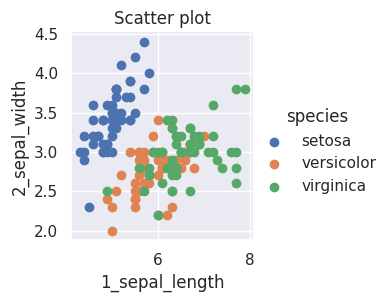

In [ ]:
#Load the data set

iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})
#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(iris, hue="species") .map(plt.scatter,"1_sepal_length", "2_sepal_width", ).add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

In [ ]:
def predict_NB_gaussian_class(X,mu_list,std_list,pi_list):
#Returns the class for which the Gaussian Naive Bayes objective function has greatest value
  scores_list = []
  classes = len(mu_list)
  for p in range(classes):
    score = (norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0] )
    * norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1] )
    * pi_list[p])
    scores_list.append(score)
  return np.argmax(scores_list)
def predict_Bayes_class(X,mu_list,sigma_list):
#Returns the predicted class from an optimal bayes classifier - distributions must be known
  scores_list = []
  classes = len(mu_list)
  for p in range(classes):
    score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
    scores_list.append(score)
  return np.argmax(scores_list)

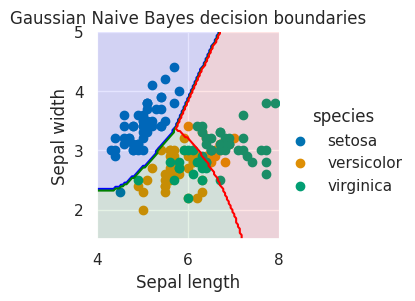

In [ ]:
#Estimating the parameters
mu_list = np.split(df1.groupby('species').mean().values,[1,2])
std_list = np.split(df1.groupby('species').std().values,[1,2], axis = 0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)
# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)
#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)
g = sns.FacetGrid(iris, hue="species", palette = 'colorblind').map(plt.scatter, "1_sepal_length", "2_sepal_width",).add_legend()
my_ax = g.ax
#Computing the predicted class function for each value on the grid
zz = np.array([predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list)
for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)
#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))
# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')
plt.show()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X do

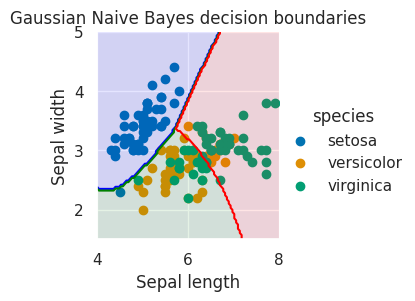

In [ ]:
from sklearn.naive_bayes import GaussianNB
#Setup X and y data
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()
#Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)
# Our 2-dimensional classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)
#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)
g = sns.FacetGrid(iris, hue="species", palette = 'colorblind').map(plt.scatter, "1_sepal_length", "2_sepal_width",).add_legend()
my_ax = g.ax
#Computing the predicted class function for each value on the grid
zz = np.array( [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)
#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))
# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB

In [ ]:
def clean(x):
    return len(x) >  1 and not (x[0] == ("#"))

In [ ]:
def readData(path):
    with open(path) as f:
        content = f.readlines()
        content = [x.replace("\n","") for x in content if clean(x)]
    data = np.zeros((len(content), 9), dtype = int)
    label = np.zeros((len(content), 1), dtype = int)
    for i, line in enumerate(content):
        a = line.split(",")
        data[i] = np.array(a[2:])
        label[i] = np.array(int(a[1]))
    return data, label

In [ ]:
data, label =  readData("datacum.txt")

data_test = np.zeros((120, 9), dtype = int)

data2_test_count = 0
data4_test_count = 0
data_test_count = 0
data_train_count = 0

X_train = np.zeros((len(data) - 120, 9), dtype= int)
Y_train = np.zeros((len(data) - 120, ), dtype = int)
Y_test = np.zeros((120, ), dtype = int)
for i in range(len(data)):
    if (label[i] == 2 and data2_test_count < 80):
        data2_test_count += 1
        data_test[data_test_count] = data[i]
        Y_test[data_test_count] = label[i]
        data_test_count += 1
    elif (label[i] == 4 and data4_test_count < 40):
        data4_test_count += 1
        data_test[data_test_count] = data[i]
        Y_test[data_test_count] = label[i]
        data_test_count += 1
    else :
        X_train[data_train_count] = data[i]
        Y_train[data_train_count] = label[i]
        data_train_count += 1

<ipython-input-5-219bf0392072>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_test[data_test_count] = label[i]
<ipython-input-5-219bf0392072>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_test[data_test_count] = label[i]
<ipython-input-5-219bf0392072>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_train[data_train_count] = label[i]


In [ ]:
model_sk = GaussianNB(priors = None)
model_sk.fit(X_train,Y_train)

Y_pred = model_sk.predict(data_test)

print("Accuracy score is:" + str(accuracy_score(Y_test,Y_pred)))
print("Precision score is:" + str(precision_score(Y_test,Y_pred, pos_label = 4)))
print("Recall score is:" + str(recall_score(Y_test,Y_pred, pos_label = 4)))

Accuracy score is:0.9333333333333333
Precision score is:0.8636363636363636
Recall score is:0.95
